In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('IMDB Dataset.csv')

In [3]:
dataset.shape
# shape of the dataset

(50000, 2)

In [4]:
dataset.columns
# columns in the dataset

Index(['review', 'sentiment'], dtype='object')

In [5]:
dataset.head(n=10)
# first 10 rows of the dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [6]:
import seaborn as sns

<AxesSubplot:xlabel='sentiment', ylabel='count'>

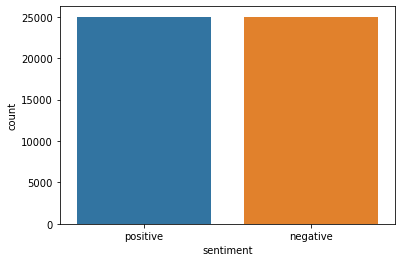

In [7]:
sns.countplot(x=dataset['sentiment'])

In [8]:
dataset['sentiment'].value_counts()
# count of each sentiment

negative    25000
positive    25000
Name: sentiment, dtype: int64

### (2) Stop word Removal and stemming

In [9]:
from nltk.corpus import stopwords
# to dealing with stopwords

from nltk.stem import PorterStemmer
# PorterStemmer --> for stemming the text

import re
# re --> regular expression

In [10]:
sw = stopwords.words('english') # as we needs to remove english stopwords
ps = PorterStemmer() # creating an object of PorterStemmer

In [11]:
def clean_text(sample):
    sample = sample.lower()
    # lowering the entire text
    
    sample = sample.replace("<br /><br />","")
    # as this is an html text. hence it is containing '<br>'
    # So, we are replacing the <br> with "", ie, remove this <br> tags
    
    sample = re.sub("[^a-zA-Z]+"," ",sample)
    # to remove those characters which are not the alphabets and replacing them with " ".
    
    sample = sample.split()
    # to apply stopword removal and stemming, we needs to iterate over the text, which is only possible 
    # if we convert this text into a list. Hence, converting this into a list.
    
    sample = [ps.stem(s) for s in sample if s not in sw]
    # iterating over the list to perform stemming
    
    sample = " ".join(sample)
    # after stemming, re join the list back into a text.
    
    return sample

In [12]:
dataset['review'][0]
# first review with stopwords and without stemming

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [13]:
clean_text(dataset['review'][0])
# first review without stopwords and after stemming

'one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'

#### Applying the stopword removal and stemming over entire dataset

In [14]:
dataset['review'] = dataset['review'].apply(clean_text)

In [15]:
dataset.head(n=10)
# dataset after the removal of stopwords

,review,sentiment
0,one review mention watch oz episod hook right ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive
5,probabl time favorit movi stori selfless sacri...,positive
6,sure would like see resurrect date seahunt ser...,positive
7,show amaz fresh innov idea first air first yea...,negative
8,encourag posit comment film look forward watch...,negative
9,like origin gut wrench laughter like movi youn...,positive


### (3) Creating the Vocab

In [16]:
max_features = 10000
# the number of words in the vocab = 10000
# 10000 is basically the number of unique words, ie. vocabulary size is 10000
# so the first 10000 relevant words will be used.

In [17]:
from keras.preprocessing.text import Tokenizer

In [18]:
tokenizer = Tokenizer(num_words=max_features, split=' ')
# tokenizer --> a vocab of 10000 words

tokenizer.fit_on_texts(dataset['review'].values)
# applying tokenization on the dataset, it will take first 10000 words

In [19]:
tokenizer.index_word
# it is saying that the first word in vocab is 'movi'
# second word is 'film'

{1: 'movi',
 2: 'film',
 3: 'one',
 4: 'like',
 5: 'time',
 6: 'good',
 7: 'make',
 8: 'charact',
 9: 'see',
 10: 'get',
 11: 'watch',
 12: 'even',
 13: 'stori',
 14: 'would',
 15: 'realli',
 16: 'well',
 17: 'scene',
 18: 'look',
 19: 'show',
 20: 'much',
 21: 'end',
 22: 'bad',
 23: 'great',
 24: 'peopl',
 25: 'go',
 26: 'love',
 27: 'also',
 28: 'first',
 29: 'think',
 30: 'act',
 31: 'play',
 32: 'way',
 33: 'thing',
 34: 'made',
 35: 'could',
 36: 'know',
 37: 'say',
 38: 'seem',
 39: 'work',
 40: 'plot',
 41: 'actor',
 42: 'two',
 43: 'mani',
 44: 'seen',
 45: 'come',
 46: 'year',
 47: 'want',
 48: 'take',
 49: 'never',
 50: 'life',
 51: 'best',
 52: 'tri',
 53: 'littl',
 54: 'ever',
 55: 'man',
 56: 'better',
 57: 'give',
 58: 'still',
 59: 'find',
 60: 'perform',
 61: 'feel',
 62: 'part',
 63: 'use',
 64: 'someth',
 65: 'director',
 66: 'actual',
 67: 'back',
 68: 'lot',
 69: 'interest',
 70: 'real',
 71: 'guy',
 72: 'old',
 73: 'funni',
 74: 'cast',
 75: 'though',
 76: 'live',

In [20]:
tokenizer.word_counts
# it means 'one' has occured 55435 times in entire dataset

OrderedDict([('one', 55435),
             ('review', 4295),
             ('mention', 3054),
             ('watch', 27873),
             ('oz', 298),
             ('episod', 5008),
             ('hook', 601),
             ('right', 7007),
             ('exactli', 1964),
             ('happen', 7185),
             ('first', 17581),
             ('thing', 16508),
             ('struck', 280),
             ('brutal', 944),
             ('unflinch', 31),
             ('scene', 21434),
             ('violenc', 2122),
             ('set', 8032),
             ('word', 3719),
             ('go', 18254),
             ('trust', 736),
             ('show', 19913),
             ('faint', 123),
             ('heart', 3273),
             ('timid', 52),
             ('pull', 1868),
             ('punch', 568),
             ('regard', 969),
             ('drug', 1819),
             ('sex', 3490),
             ('hardcor', 230),
             ('classic', 4303),
             ('use', 10227),
             ('

In [21]:
import pickle

In [22]:
# now saving this tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

### (4) Creating the X, 
### X --> rows = 50000
### X --> columns = not specific, it contains different columns for each row, where column number is equals to number of words in that review (or row)

In [23]:
X = tokenizer.texts_to_sequences(dataset['review'].values)
# X --> in each row it basically contains index of those words which are there in the review

In [24]:
len(X)
# ie, it has 50000 reviews

50000

In [25]:
len(X[0])
# ie, first review has 153 words

153

In [26]:
len(X[1])
# ie, second review has 79 words

79

In [27]:
print(X[0])
# they are the indexes of 153 words of first review

[3, 237, 354, 11, 2645, 189, 1585, 111, 557, 106, 28, 33, 2757, 2645, 1092, 17, 498, 86, 111, 289, 25, 1344, 19, 4815, 333, 8116, 19, 584, 1645, 1059, 601, 314, 498, 3174, 236, 63, 289, 153, 2645, 6222, 306, 5348, 1822, 502, 1114, 1288, 427, 3284, 1881, 756, 1868, 1766, 853, 204, 225, 3626, 2501, 427, 270, 43, 3373, 9043, 5517, 1046, 896, 2140, 229, 2037, 5642, 407, 6624, 6310, 49, 146, 165, 14, 37, 202, 793, 19, 607, 102, 195, 19, 1499, 666, 103, 273, 1017, 2188, 178, 666, 617, 666, 737, 2645, 710, 107, 28, 189, 54, 129, 2757, 1385, 1727, 37, 1427, 11, 364, 918, 2645, 114, 7546, 225, 445, 1191, 498, 498, 5041, 2881, 1701, 2568, 4287, 100, 458, 10, 165, 16, 971, 571, 558, 4287, 93, 756, 3851, 607, 300, 596, 991, 756, 344, 11, 2645, 118, 133, 1809, 2608, 222, 1452, 10, 438, 3374, 359]


### (5) XT --> taking first 25000 reviews into the training set
###       Xt --> taking last 25000 reviews into the testing set

In [28]:
XT = X[:25000] # XT --> taking first 25000 reviews into the training set
Xt = X[25000:] # Xt --> taking last 25000 reviews into the testing set
# NOTE --> ie, we have divided X into two parts --> i) XT and ii) Xt

In [29]:
print(len(XT))
print(len(Xt))

25000
25000


### (6) Vectorization of reviews, ie, making each review of size 10000
#### (6.1) X_train and X_test

In [30]:
def vectorize_sentences(sentences,dim=10000):
    outputs=np.zeros((len(sentences),dim)) 
    # outputs --> (25000 x 10000) matrix
    
    for i,idx in enumerate (sentences):
        outputs[i,idx]=1
    return outputs

In [31]:
X_train = vectorize_sentences(XT)
X_test = vectorize_sentences(Xt)

In [32]:
print(X_train.shape)
print(X_test.shape)
# basically in each row we have one review and for that review we have 10000 columns
# and if that index word is present in review then it will be 1 otherwise it will be 0

(25000, 10000)
(25000, 10000)


#### (6.2) Y_train and Y_test
#### Encoding positive as 1 and negative as 0

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# we have two types of sentiment, so to encode them with numbers

In [34]:
y = dataset['sentiment'].values

In [35]:
y = le.fit_transform(y)

In [36]:
y[:100]
# 1--> positive
# 0--> negative
# value of first 100 reviews

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [37]:
Y_train = y[:25000] # YT --> training set of y
Y_test = y[25000:] # Yt --> test set of y

In [38]:
print(len(Y_train))
print(len(Y_test))

25000
25000


### (7) Spliting the training set (25000) into 
### i) train_new (20000)
### ii) validation (5000)

In [39]:
x_train_new = X_train[:20000]
x_val = X_train[20000:]

y_train_new = Y_train[:20000]
y_val = Y_train[20000:]

In [40]:
print(x_val.shape)
print(x_train_new.shape)
print(y_val.shape)
print(y_train_new.shape)

(5000, 10000)
(20000, 10000)
(5000,)
(20000,)


### (8) Defining the model architecture
#### Using Fully Connected/ Dense Layers with ReLu activation
#### 2 Hidden layers with 16 units each
#### 1 output layer with 1 unit (Sigmoid activation)

In [41]:
from keras import models
from keras.layers import Dense

In [42]:
model=models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,))) # first hidden layer having 16 neurons.
model.add(Dense(16,activation='relu')) # second hidden layer having 16 neurons.
model.add(Dense(1,activation='sigmoid')) # output layer having only 1 neuron which can be used for binary classification.

In [43]:
model.summary()
# parameters are nothing but weights and biases
# 160016 = (10000 * 16) + 16, 10000-->features || 16-->neurons in H1 layer || 16-->bias term
# 272 = (16 * 16) + 16, 16-->neurons in H1 layer || 16-->neurons in H2 layer || 16-->bias term
# 17 = (16 * 1) + 1, 16-->neurons in H2 layer || 1-->neurons in O/P layer || 1-->bias term

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compile the model
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# loss function --> binary cross entropy
# optimizer --> rmsprop (it basically helps to reduce the loss function)
# metrics --> after each epoch, we can judge our training procedure, for that judgement we are using
#             'accuracy' parameter here.

In [45]:
# Executing the model
hist = model.fit(
    x_train_new, 
    y_train_new,
    epochs=20,
    batch_size=512,
    validation_data=(x_val,y_val)
)

Epoch 1/20
40/40 [==============================] - 2s 56ms/step - loss: 0.5048 - accuracy: 0.8137 - val_loss: 0.3818 - val_accuracy: 0.8646
Epoch 2/20
40/40 [==============================] - 1s 30ms/step - loss: 0.2940 - accuracy: 0.9043 - val_loss: 0.3092 - val_accuracy: 0.8758
Epoch 3/20
40/40 [==============================] - 1s 29ms/step - loss: 0.2190 - accuracy: 0.9250 - val_loss: 0.3171 - val_accuracy: 0.8662
Epoch 4/20
40/40 [==============================] - 1s 31ms/step - loss: 0.1787 - accuracy: 0.9388 - val_loss: 0.3562 - val_accuracy: 0.8630
Epoch 5/20
40/40 [==============================] - 1s 30ms/step - loss: 0.1487 - accuracy: 0.9513 - val_loss: 0.3456 - val_accuracy: 0.8676
Epoch 6/20
40/40 [==============================] - 1s 30ms/step - loss: 0.1255 - accuracy: 0.9585 - val_loss: 0.3494 - val_accuracy: 0.8730
Epoch 7/20
40/40 [==============================] - 1s 31ms/step - loss: 0.1062 - accuracy: 0.9661 - val_loss: 0.3727 - val_accuracy: 0.8714
Epoch 8/20
40

### (9) Visualizing the validation accuracy and loss

In [46]:
import matplotlib.pyplot as plt

In [47]:
plt.style.use('seaborn')

In [48]:
h = hist.history
# it is a dictionary having keys as 'accuracy' , 'loss', 'val_accuracy' and their values

#### (9.1) Loss vs Epoch

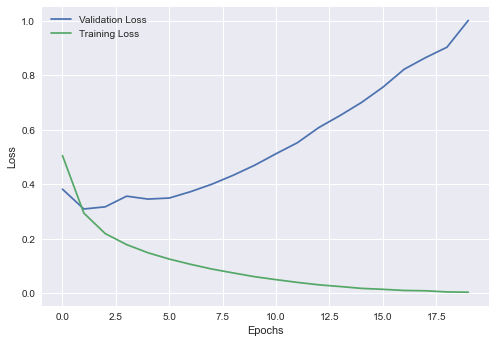

In [49]:
plt.plot(h['val_loss'],label="Validation Loss")
plt.plot(h['loss'],label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# ie, after some epochs our validation loss decreases but after that it starts to increase 
# which basically means overfitting

#### (9.2) Accuracy vs Epoch

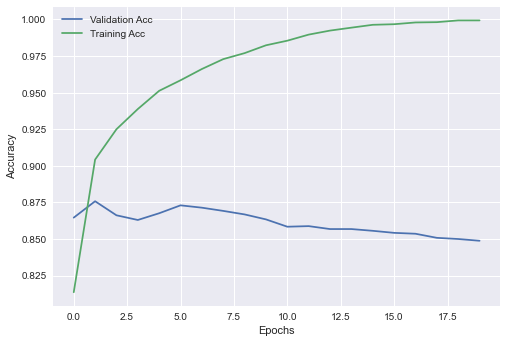

In [50]:
plt.plot(h['val_accuracy'],label="Validation Acc")
plt.plot(h['accuracy'],label="Training Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
# after some epochs, validation accuracy starts to decrease---> overfitting
# so now we will stop after some 3-4 epochs called as stop early.

### (10) So now we will run our model for 4 epochs

In [51]:
# when epochs = 4
hist = model.fit(
    x_train_new,
    y_train_new,epochs=4,
    batch_size=512,
    validation_data=(x_val,y_val)
)

Epoch 1/4
40/40 [==============================] - 2s 40ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 1.0527 - val_accuracy: 0.8490
Epoch 2/4
40/40 [==============================] - 1s 24ms/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 1.1536 - val_accuracy: 0.8500
Epoch 3/4
40/40 [==============================] - 1s 30ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 1.1206 - val_accuracy: 0.8482
Epoch 4/4
40/40 [==============================] - 1s 30ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 1.1889 - val_accuracy: 0.8478


In [52]:
h = hist.history

#### Loss vs Epoch

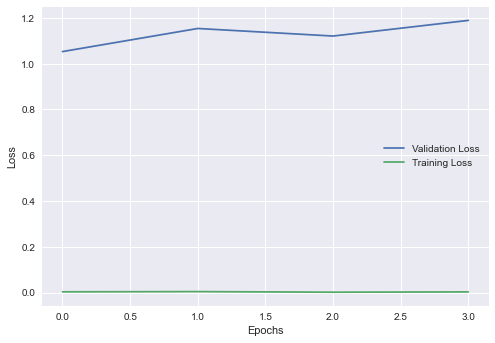

In [53]:
plt.plot(h['val_loss'],label="Validation Loss")
plt.plot(h['loss'],label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Accuracy vs Epoch

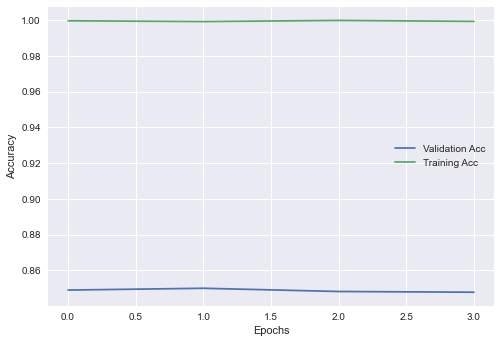

In [54]:
plt.plot(h['val_accuracy'],label="Validation Acc")
plt.plot(h['accuracy'],label="Training Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### (11) Analyzing the developed model

In [55]:
x = model.evaluate(X_test,Y_test)[1]*100
x = round(x,2)
print("Accuracy on test set = ",x,"%")

782/782 [==============================] - 2s 3ms/step - loss: 1.1494 - accuracy: 0.8542
Accuracy on test set =  85.42 %


In [56]:
x = model.evaluate(X_train,Y_train)[1]*100
x = round(x,2)
print("Accuracy on training set = ",x,"%")

782/782 [==============================] - 2s 2ms/step - loss: 0.2384 - accuracy: 0.9694
Accuracy on training set =  96.94 %


In [57]:
result = model.predict(X_test)
# applying on test dataset
# result basically has the probability of each reviews that by what probability it can be positive(ie,1)

In [58]:
print(result)
# first review has 0.04 probability that it is positive and so on...

[[1.4115828e-05]
 [6.5887580e-05]
 [1.0000000e+00]
 ...
 [1.0000000e+00]
 [2.3770444e-06]
 [4.2781376e-06]]


In [59]:
result_train = model.predict(X_train)
# applying model on training dataset

In [60]:
print(result_train)
# first review has 0.97 probability that it is positive and so on...

[[1.0000000e+00]
 [1.0000000e+00]
 [9.9999940e-01]
 ...
 [1.0000000e+00]
 [1.0000000e+00]
 [6.3482315e-05]]


# ------------------------------END----------------------------------